<h1 style="background-color:#FF45D7; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Metadata
</h1>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Customer Data Base
</h2>

- *carID* - An attribute that contains an identifier for each car;
- *Brand* -  The car’s main brand (e.g. Ford, Toyota);
- *model* -  The car model;
- *year* -  The year of Registration of the Car;
- *mileage* - The total reported distance travelled by the car (inmiles);
- *tax* - The amount of road tax (in £) that, in 2020, wasapplicable to the car in question;
- *fuelType* - Type of Fuel used by the car (Diesel, Petrol, Hybrid,Electric);
- *mpg* - Average Miles per Gallon;
- *engineSize* - Size of Engine in liters (Cubic Decimeters);
- *paintQuality%* - The mechanic’s assessment of the cars’ overall paintquality and hull integrity (filled by the mechanicduring evaluation);
- *previousOwners* - Number of previous registered owners of the vehicle.
- *hasDamage* - Boolean marker filled by the seller at the time ofregistration stating whether the car is damaged or not;
- *price* The car’s price when purchased by Cars 4 You (in £);




In [1385]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

# path to folder
df_train = pd.read_csv("project_data/train.csv", delimiter=',', header=0, decimal='.', quotechar='"')

In [1386]:
#divinding into X and y, as well as validation set and training set
X_test = pd.read_csv("project_data/test.csv", delimiter=',', header=0, decimal='.', quotechar='"')
# setting 'carID' as index
df_train.set_index('carID', inplace = True)
X_test.set_index('carID', inplace = True)


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
1. Data Pre-processing and Cleaning
</h2>

<h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
.shape, .head() and .tail() visualizations
</h3>

In [1387]:
df_train.shape, X_test.shape

((75973, 13), (32567, 12))

In [1388]:
df_train.head() #Checking the first rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [1389]:
X_test.head() #Checking the first rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [1390]:
df_train.tail() #Checking the last rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [1391]:
X_test.tail() #Checking the last rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
105775,VW,Tiguan,2017.0,Manual,27575.00000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
81363,BMW,X2,2020.0,Automatic,1980.00000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
76833,Audi,Q5,2019.0,Semi-Auto,8297.00000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
91768,Mercedes,A Class,2019.0,Manual,-50755.21023,Petrol,145.0,28.5,1.3,81.0,1.0,0.0
99627,Toyota,Yaris,2017.0,Automatic,11071.00000,Petrol,30.0,58.0,1.3,98.0,4.0,0.0


In [1392]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Data types, duplicate/missing/unique values, typecasting, feature stats
</h3>

### **Data Types and Typecasting**

In [1393]:
df_train.dtypes #Checking the datatypes of each feature in the dataset df_train

Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

'year' should be a datetime object. 'previousOwnwers' is also portrayed on the wrong data type, as it should be an Integer. The remainder seem to be correctly assigned

In [1394]:
#correcting the data types
df_train['year']=pd.to_datetime(df_train['year'], format='%Y')
df_train["year"] = df_train["year"].dt.year
X_test['year']=pd.to_datetime(X_test['year'], format='%Y')
X_test["year"] = X_test["year"].dt.year

#previousOwnwers to integer will be done later on the pre-processing step

### **Missing Values**

In [1395]:
df_train.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
df_train.isna().sum() #Checking the number of missing values in each feature of the dataset X

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [1396]:
X_test.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
X_test.isna().sum() #Checking the number of missing values in each feature of the

Brand              649
model              650
year               653
transmission       623
mileage            689
fuelType           656
tax               3308
mpg               3288
engineSize         628
paintQuality%      625
previousOwners     597
hasDamage          597
dtype: int64

<span style="color:red">The missing values on all features have to be handled!</span>


### **Duplicated Values**

In [1397]:

print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 4


The training set has 11 duplicated lines. Its' presence is insignificant, therefore we can drop them.

In [1398]:
df_train = df_train.drop_duplicates()
print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 0


In [1399]:
print("\nDuplicated values:", X_test.duplicated().sum())



Duplicated values: 0


### **Numerical Variables Statistics**

In [1400]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74478.0,2017.091785,2.211158,1970.000000,2016.0,2017.0,2019.0,2024.000000
price,75969.0,16882.001922,9737.075658,450.000000,10200.0,14699.0,20950.0,159999.000000
mileage,74507.0,23004.761128,22130.041696,-58540.574478,7423.5,17301.0,32428.0,323000.000000
tax,68067.0,120.328500,65.522046,-91.121630,125.0,145.0,145.0,580.000000
mpg,68045.0,55.152286,16.497834,-43.421768,46.3,54.3,62.8,470.800000
engineSize,74453.0,1.660161,0.573464,-0.103493,1.2,1.6,2.0,6.600000
paintQuality%,74445.0,64.591773,21.020975,1.638913,47.0,65.0,82.0,125.594308
previousOwners,74419.0,1.994485,1.472961,-2.345650,1.0,2.0,3.0,6.258371
hasDamage,74421.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


### **Categorical Features Unique Values**

Checking if all the unique values of the categorical features are appropriate.

In [1401]:
for var in df_train.columns:
    if df_train[var].dtype == 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

Brand unique values: ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot'] 

model unique values: [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 '

We observe that there are typos present on all categorical variables. We have to get them fixed in order to understand the data better and clear out inconsistencies.


In [1402]:
for var in X_test.columns:
    if X_test[var].dtype == 'object':
        print(f"{var} unique values: {X_test[var].unique()} \n")

Brand unique values: ['Hyundai' 'VW' 'BMW' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyot' 'Toyota'
 'Audi' nan 'For' 'Ope' 'toyota' 'vw' 'hyundai' 'MW' 'SKODA' 'ord' 'udi'
 'bmw' 'V' 'BM' 'HYUNDAI' 'OPEL' 'mercedes' 'audi' 'Mercede' 'pel' 'opel'
 'FORD' 'yundai' 'ford' 'Aud' 'oyota' 'MERCEDES' 'ercedes' 'AUDI' 'koda'
 'Hyunda' 'W' 'skoda' 'Skod' 'ercede' 'TOYOTA' 'ERCEDES' 'kod' 'ORD' 'v'
 'ud' 'M' 'FOR' 'for' 'MERCEDE' 'YUNDAI' 'PEL' 'ope' 'or' 'TOYOT' 'hyunda'
 'oyot' 'UDI' 'mw' 'pe' 'bm'] 

model unique values: [' I30' ' Tiguan' ' 2 Series' ' Grandland X' '1 Series' ' Fiesta' ' X1'
 ' B Class' ' Focus' ' Superb' ' 5 Series' ' C Class' ' Up' ' Aygo' 'Golf'
 ' M CLAS' ' Land Cruiser' ' TT' ' Adam' ' Zafira' ' E Class' ' Golf'
 ' 3 Series' ' IX20' ' A4' ' Yaris' ' Passat' ' I10' ' Mokka X'
 ' EcoSport' ' 1 Series' ' 4 Series' ' A7' ' Corsa' ' Kuga' ' Grand C-MAX'
 ' Q2' ' M4' ' A Class' ' RAV4' ' Fabia' ' Insignia' ' A1' ' X6' ' Meriva'
 ' Caravelle' ' Octavia' ' Auris' ' X-CLASS' ' FOCUS' '

We designed a function to automatically correct the typos found in the training and test data set:

In [1403]:
def normalize_data(x):
    x = str(x)
    x = x.lower()
    x = x.replace("_", "")
    x = x.replace("-", "")
    x = x.replace(" ", "")
    if x == "nan":
        return np.nan
    return x


def correct_missing_letters(value, valid_list, max_missing=2):
    """
    corrects values with missing letters based on valid_list
    """
    best_match = value
    smallest_diff = 999
    if pd.isna(value):  # <- ignores NaN
        return np.nan
    for ref in valid_list:
        # absolute length difference
        len_diff = abs(len(ref) - len(value))
        if len_diff == 0 or len_diff > max_missing:
            continue  # ignora se igual ou diferença > limite

        # verificar se o valor é subsequência do nome correto (mantendo ordem)
        it = iter(ref)
        is_subseq = all(ch in it for ch in value)

        if is_subseq and len_diff < smallest_diff:
            smallest_diff = len_diff
            best_match = ref

    return best_match

valid_list = []


In [1404]:
#correcting 'Brand' feature
valid_list = ["bmw", "mercedes", "ford", "hyundai", "audi", "toyota", "opel", "skoda", "vw"]
df_train["Brand"] = df_train["Brand"].apply(normalize_data)
df_train["Brand"] = df_train["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))


X_test["Brand"] = X_test["Brand"].apply(normalize_data)
X_test["Brand"] = X_test["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))

df_train[df_train["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

In [1405]:
#correcting 'fuelType' feature
valid_list = ["diesel", "petrol", "hybrid", "electric","other"]
df_train["fuelType"] = df_train["fuelType"].apply(normalize_data)
df_train["fuelType"] = df_train["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))

X_test["fuelType"] = X_test["fuelType"].apply(normalize_data)
X_test["fuelType"] = X_test["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))
X_test["fuelType"].unique()

df_train[df_train["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

print(df_train["fuelType"].unique())

['petrol' 'diesel' 'hybrid' nan 'other' 'electric']


In [1406]:
#correcting 'model' feature
car_models = [
"GOLF", "POLO", "PASSAT", "TIGUAN", "TIGUANALLSPACE", "TOUAREG", "TROC", "TCROSS", "ARTEON",
"SHARAN", "JETTA", "CC", "CARAVELLE", "CALIFORNIA", "CADDY", "CADDYMAXI", "TOURAN", "GOLFSV",
"BEETLE", "SCIROCCO", "UP", "AMAROK", "EOS", "FOX", "FOCUS", "FIESTA", "MONDEO", "KUGA", "GALAXY",
"SMAX", "BMAX", "ECOSPORT", "PUMA", "TOURNEOCUSTOM", "TOURNEOCONNECT", "KA", "KAPLUS", "CMAX",
"GRANDCMAX", "EDGE", "MUSTANG", "GRANDTOURNEOCONNECT", "FUSION", "STREETKA", "RANGER", "ESCORT",
"CORSA", "ASTRA", "INSIGNIA", "MOKKA", "ZAFIRA", "VIVA", "MERIVA", "ADAM", "COMBOLIFE", "CROSSLANDX",
"GRANDLANDX", "GTC", "ANTARA", "VIVARO", "VECTRA", "AGILA", "TIGRA", "CASCADA", "AMPERA", "SERIES1",
"SERIES2", "SERIES3", "SERIES4", "SERIES5", "SERIES6", "SERIES7", "SERIES8", "X1", "X2", "X3", "X4",
"X5", "X6", "X7", "Z3", "Z4", "M2", "M3", "M4", "M5", "M6", "A1", "A2", "A3", "A4", "A5", "A6", "A7",
"A8", "Q2", "Q3", "Q5", "Q7", "Q8", "S3", "S4", "S5", "S8", "RS3", "RS4", "RS5", "RS6", "SQ5", "SQ7",
"TT", "R8", "ACLASS", "BCLASS", "CCLASS", "ECLASS", "SCLASS", "CLACLASS", "CLSCLASS", "GLACLASS",
"GLBCLASS", "GLCCLASS", "GLECLASS", "GLSCLASS", "GLCLASS", "GCLASS", "VCLASS", "XCLASS", "SLCLASS",
"SLKCLASS", "MCLASS", "CLK", "CLCLASS", "CLCCLASS", "MERCEDES200", "MERCEDES230", "MERCEDES220",
"YARIS", "AYGO", "COROLLA", "CHR", "AVENSIS", "PRIUS", "RAV4", "HILUX", "VERSO", "SUPRA",
"LANDCRUISER", "CAMRY", "PROACEVERSO", "URBANCRUISER", "AURIS", "GT86", "I10", "I20", "I30", "I40",
"I800", "IONIQ", "KONA", "TUCSON", "SANTAFE", "GETZ", "IX20", "IX35", "VELOSTER", "ACCENT",
"TERRACAN", "FABIA", "OCTAVIA", "SUPERB", "KAROQ", "KODIAQ", "KAMIQ", "YETI", "SCALA", "RAPID",
"CITIGO", "ROOMSTER", "LEON", "ATECA", "TOLEDO", "ARONA", "IBIZA", "ALHAMBRA", "SHUTTLE", "KADJAR", "IQ"
]

valid_list_models = [x.lower() for x in car_models]
df_train["model"] = df_train["model"].apply(normalize_data)
df_train["model"] = df_train["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
#df_train["models"].unique()
X_test["model"] = X_test["model"].apply(normalize_data)
X_test["model"] = X_test["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
X_test["model"].unique()

manual_corrections = {
    'ka+' : 'ka',
    'slk' : 'slkclass',
    '7series' : 'series7',
    '230' : 'mercedes230',
    'yetioutdoor' : 'yeti',
    'yetioutdoo' : 'yeti',
    'zafiratoure' : 'zafira',
    '220' : 'mercedes220',
    '6series' : 'series6',
    '4series' : 'series4',
    'zafiratourer' : 'zafira',
    '2series' : 'series2',
    '1serie' : 'series1',
    '1series' : 'series1',
    'rclass' : 'eclass',
    '7serie' : 'series7',
    '180' : 'mercedes200',
    'caddylife' : 'caddy',
    '5series' : 'series5',
    '5serie' : 'series5',
    '3series' : 'series3',
    '6serie' : 'series6',
    '3serie' : 'series3',
    '2serie' : 'series2',
    '4serie' : 'series4',
    '200' : 'mercedes200',
    'sl' : 'slclass',
    'transittourneo' : 'tourneoconnect',
    'amica' : 'agila',
    'mokkax' : 'mokka',
    'caddymaxilife' : 'caddymaxi',
    '8series' : 'series8',
    'versos' : 'verso',
    'caddymaxilif' : 'caddymaxi',
    '8serie' : 'series8',
    'rs7' : 'rs6'
}
X_test["model"] = X_test["model"].replace(manual_corrections)
X_test["model"] = X_test["model"].replace(manual_corrections)

df_train[df_train["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan


In [1407]:
#correcting 'transmission' feature
valid_list = ["automatic", "manual", "semiauto", 'unknown']
df_train["transmission"] = df_train["transmission"].apply(normalize_data)
df_train["transmission"] = df_train["transmission"].apply(lambda x: correct_missing_letters(x, valid_list))
df_train["transmission"].unique()

df_train[df_train["transmission"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["transmission"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

### **Numerical Features Unique Values**

Checking if all the unique values of the Numerical features are appropriate.

In [1408]:
for var in df_train.columns:
    if df_train[var].dtype != 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

year unique values: [2016. 2019. 2018. 2014. 2017. 2020. 2013.   nan 2015. 2023. 2011. 2012.
 2003. 2009. 2005. 2004. 2010. 2008. 2024. 2007. 2006. 2001. 2000. 2002.
 2022. 1996. 1998. 1970. 1999. 1997.] 

price unique values: [22290. 13790. 24990. ... 33606. 16809. 25785.] 

mileage unique values: [28421.  4589.  3624. ... 13613. 52134. 69072.] 

tax unique values: [         nan 145.          30.          20.         150.
 160.         -56.19320154   0.         125.         200.
 250.         135.         300.         205.         260.
 326.02823317 325.         -45.78061049 265.         305.
 303.14889146 235.         299.47350391 240.         165.
 140.         540.         155.         220.         120.
 330.         290.48678508 -20.24107949 -18.33074314 327.91577835
 270.         115.         185.         316.48718937 570.
 -49.15354066 316.29630636 -60.6840948  555.         277.38425448
 -91.12163048  10.         315.         190.         -31.91494466
 230.         -43.24208237 

Some features have negative values where it does not make sense to exist. 

For 'previousOwners' we will substitute the negatives for 0, as it is the most likely value to be set.

In [1409]:
#correcting negative previousOwners values
df_train[df_train["previousOwners"] < 0] = 0
X_test[X_test["previousOwners"] < 0] = 0
df_train["previousOwners"].unique()

array([4.        , 1.        , 0.        , 3.        , 2.        ,
              nan, 6.25837066, 6.22789796, 6.25823052, 6.23017958,
       6.21772443, 6.24583495, 6.2482512 , 6.23308217, 6.24177863])

For 'tax', 'mileage', 'mpg' and 'engineSize' the incorrect values are nearly insignificant, consequently they are removable.

In [1410]:

#correcting negative tax values
#mask=(df_train["tax"]<0)
df_train = df_train[df_train["tax"]>0]
X_test=X_test[X_test["tax"]>0]
df_train["tax"].unique()

#correcting negative engineSize values
df_train = df_train[df_train["engineSize"]>0]
X_test=X_test.loc[X_test["engineSize"]>0]
df_train["engineSize"].unique()

#correcting negative mileage values
df_train = df_train[df_train["mileage"]>0]
X_test=X_test[X_test["mileage"]>0]


#correcting negative mpg values
df_train = df_train[df_train["mpg"]>0]
X_test=X_test[X_test["mpg"]<0]



'hasDamage' is a constant variable, therefore we can drop it as it will not influence any predictions.

In [1411]:
#dropping hasDamage column
# X = X.drop(columns=['hasDamage'])
# X_test = X_test.drop(columns=['hasDamage'])

### **Metric/Non-Metric Features**

Lets divide our features in numeric and non-numeric to treat them accordingly

In [1412]:
cat_features=["Brand", "model", "year", "fuelType", "transmission"]
metric_features=df_train.columns.drop(cat_features).tolist()





<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
2. Data Understanding
</h2>

### **Histograms**

We start plotting histograms of all the numerical features.

Text(0.5, 0.98, "Numeric Variables' Histograms")

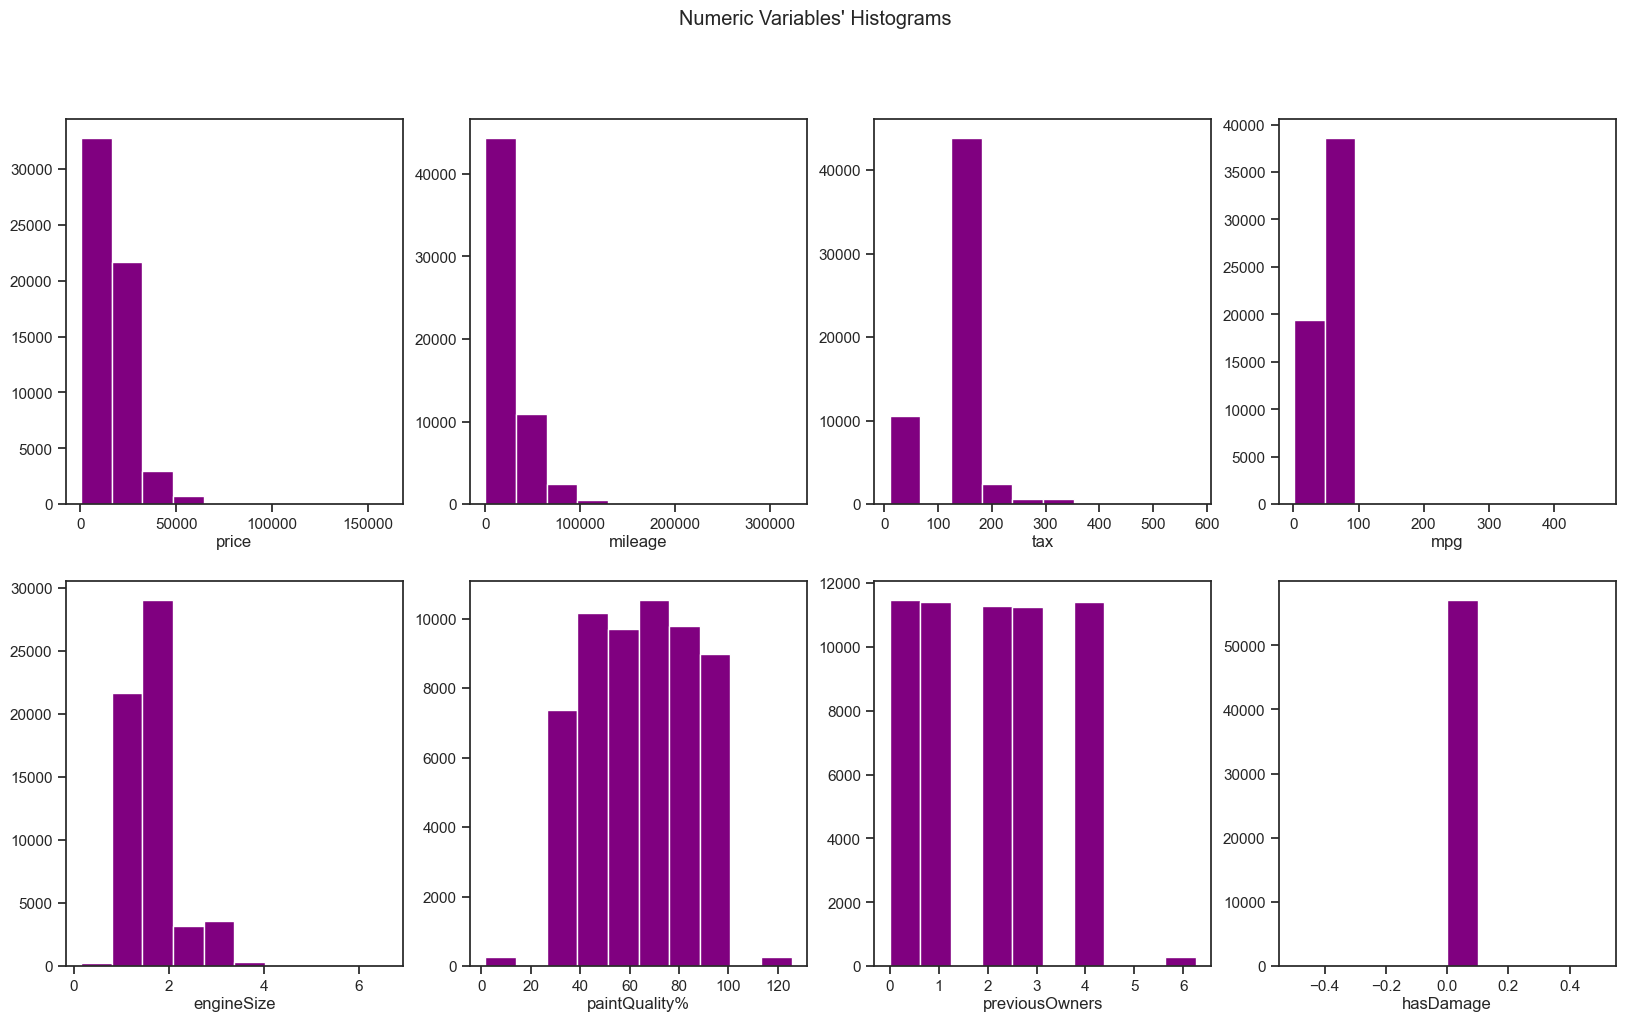

In [1413]:
sp_rows = 2
sp_cols = 4


#Histograms
sns.set_style("ticks")
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_train[feat], color=("purple"))
    ax.set_title(feat, y=-0.13)  
# Layout
plt.suptitle("Numeric Variables' Histograms")

### **Boxplot**

We can also plot the boxplot of all the numerical features.

Text(0.5, 0.98, 'BoxPlots')

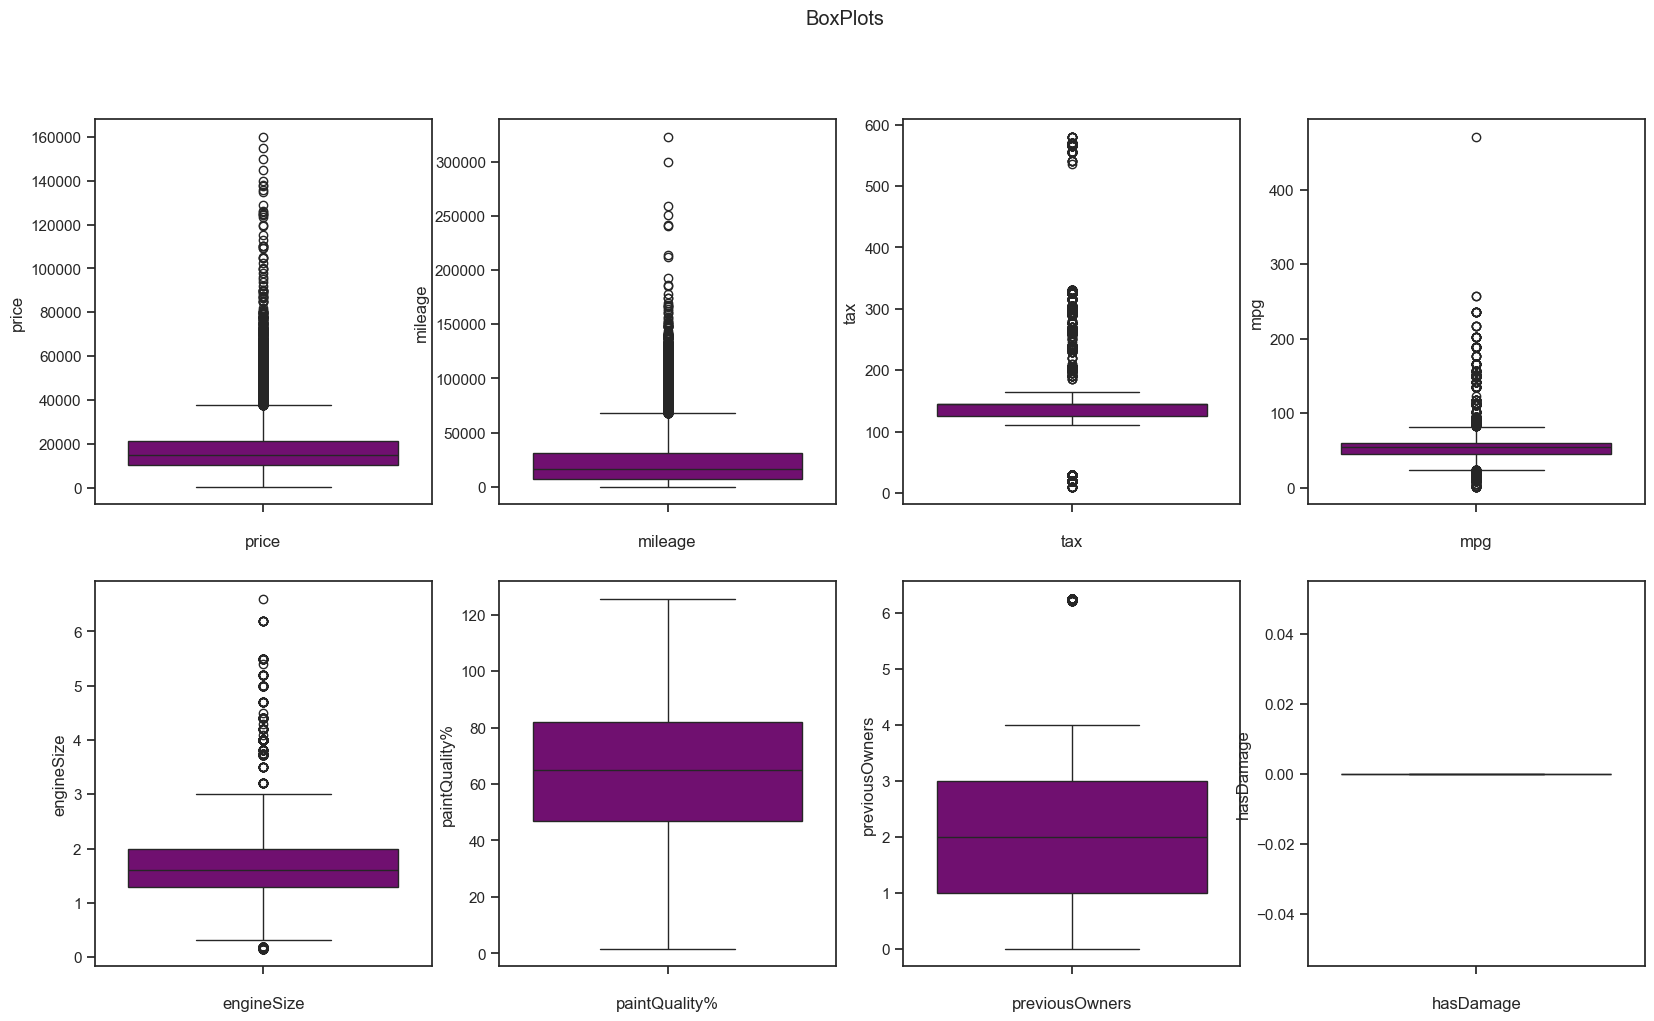

In [1414]:
#boxplot
# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(y=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13) 

plt.suptitle("BoxPlots")



### **BarPlot**

For categorical features we will observe them via a Bar Plot.

Text(0.5, 0.98, "Categorical Variables' Histplot")

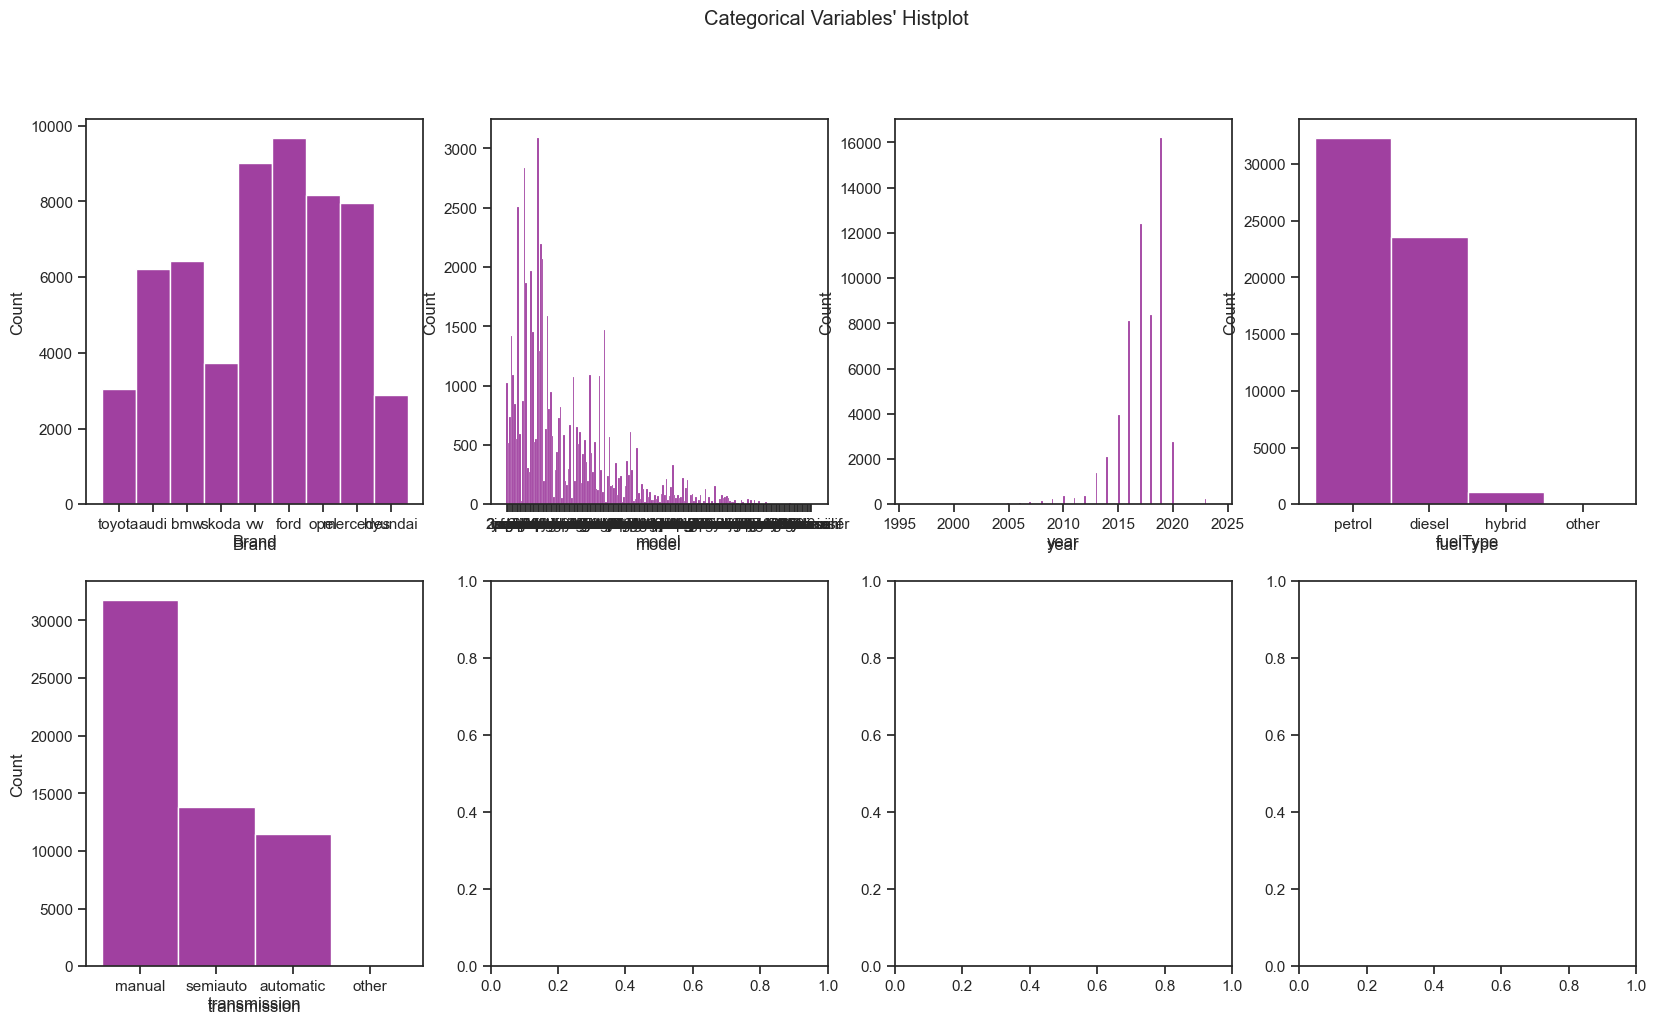

In [1415]:
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), cat_features): 
    sns.histplot(x=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13)



plt.suptitle("Categorical Variables' Histplot")

For better visualization plots we targetted important intervals.

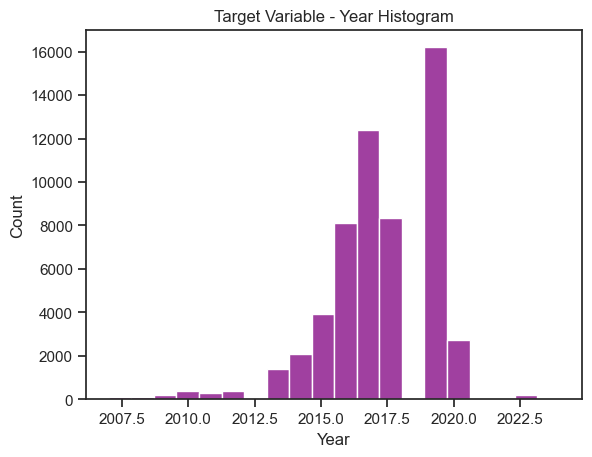

In [1416]:
# Histogram of variable 'year' after 2007
sns.histplot(df_train[df_train["year"] >= 2007]["year"].astype(int), bins=20, color=("purple"))
plt.title("Target Variable - Year Histogram")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show() 

In [1417]:
#Isto nao me esta a dar bem
"""
# 1. Calculate the value counts for the 'model' feature
model_counts = df_train['model'].value_counts()

# 2. Filter to keep only the models that appear more than 500 times
popular_models = model_counts.index

# 3. Create a filtered DataFrame containing only the popular models
#    We use .isin() to check if the model name is in our 'popular_models' list
df_train_filtered = df_train[df_train['model'].isin(popular_models)]

# 4. Create the countplot using the filtered data
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train_filtered, x='model', palette='Purples', order = popular_models)

# 5. Add titles and labels for clarity
plt.title("Categorical Variable - Popular Model Countplot")
plt.xlabel("Model")
plt.ylabel("Count")

# 6. Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# 7. Display the plot
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

"""

'\n# 1. Calculate the value counts for the \'model\' feature\nmodel_counts = df_train[\'model\'].value_counts()\n\n# 2. Filter to keep only the models that appear more than 500 times\npopular_models = model_counts.index\n\n# 3. Create a filtered DataFrame containing only the popular models\n#    We use .isin() to check if the model name is in our \'popular_models\' list\ndf_train_filtered = df_train[df_train[\'model\'].isin(popular_models)]\n\n# 4. Create the countplot using the filtered data\nplt.figure(figsize=(12, 6))\nsns.countplot(data=df_train_filtered, x=\'model\', palette=\'Purples\', order = popular_models)\n\n# 5. Add titles and labels for clarity\nplt.title("Categorical Variable - Popular Model Countplot")\nplt.xlabel("Model")\nplt.ylabel("Count")\n\n# 6. Rotate x-axis labels for better readability\nplt.xticks(rotation=45, ha=\'right\')\n\n# 7. Display the plot\nplt.tight_layout() # Adjust layout to prevent labels from being cut off\nplt.show()\n\n'

### Multivariate Analysis

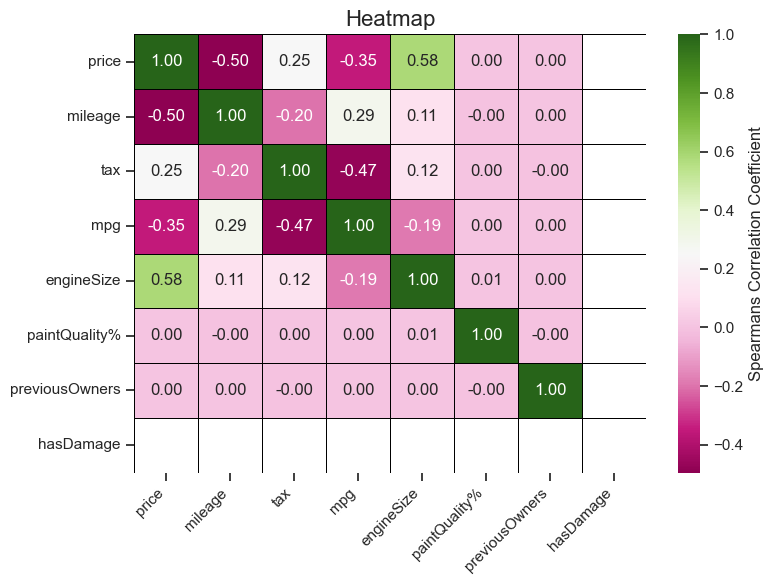

In [1418]:

correlation_matrix_spearman = df_train[metric_features].corr(method='spearman')

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix_spearman,
    annot=True,     
    fmt=".2f",      
    cmap='PiYG',
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Spearmans Correlation Coefficient'}
)

plt.title('Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

By observing the Scatter Plot below we can assume this variables are strongly negatively correlated. On the other hand, for 'mileage' inferior to around 5000 (miles) we notice a large variation in 'price'.

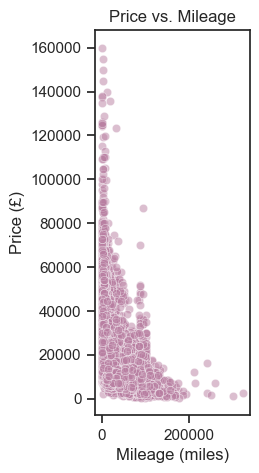

In [1419]:
sns.set_style("ticks")



plt.figure(figsize=(2, 5))
sns.scatterplot(x='mileage', y='price', data=df_train, alpha=0.5, color="#B87EA1")
plt.title('Price vs. Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (£)')

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

We understand that these two features are positively correlated. The cars with the highest selling price are the most recent ones, as a whole.

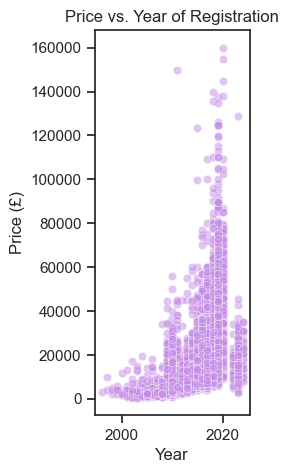

In [1420]:
plt.figure(figsize=(2, 5))
sns.scatterplot(x='year', y='price', data=df_train, alpha=0.5, color='#C48AE6')
plt.title('Price vs. Year of Registration')
plt.xlabel('Year')
plt.ylabel('Price (£)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

BMW and Mercedes have the highest median value, while VW and Audi have a large price range. Opel and Toyota appear to be the most accecible brands.

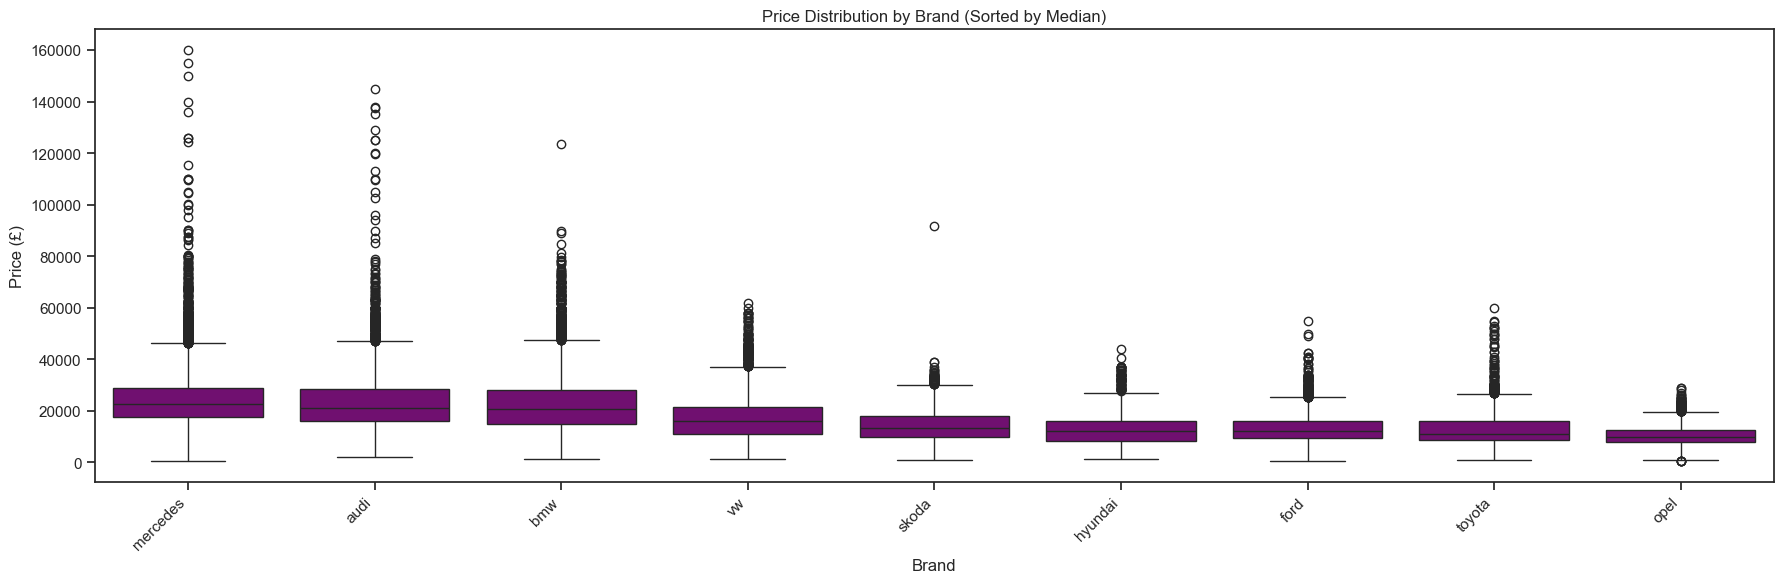

In [1421]:
plt.figure(figsize=(18, 6))

median_price = df_train.groupby('Brand')['price'].median().sort_values(ascending=False)

sns.boxplot(x='Brand', y='price', data=df_train, order=median_price.index, color='purple')
plt.title('Price Distribution by Brand (Sorted by Median)')
plt.xlabel('Brand')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

In [1422]:
X = df_train.drop('price', axis = 1)
y = df_train['price']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  shuffle = True)


metric_features.remove('price')
metric_features



['mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'hasDamage']

### **Outlier Analysis on Numerical Variables**

#### IQR

Checking by the standard IQR analysis the outliers that are present in our variable.

In [1423]:
for col in metric_features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(X_train):.2%})")

mileage: 1816 outliers (4.45%)
tax: 9978 outliers (24.46%)
mpg: 618 outliers (1.51%)
engineSize: 443 outliers (1.09%)
paintQuality%: 0 outliers (0.00%)
previousOwners: 208 outliers (0.51%)
hasDamage: 0 outliers (0.00%)


Only 'tax' has a significant outlier percentage. The others might demonstrate different behaviours only.

Therefore, we can manually remove outliers from 'mileage', 'tax' and 'mpg' as the we can clearly see a separation on the boxplot made previously

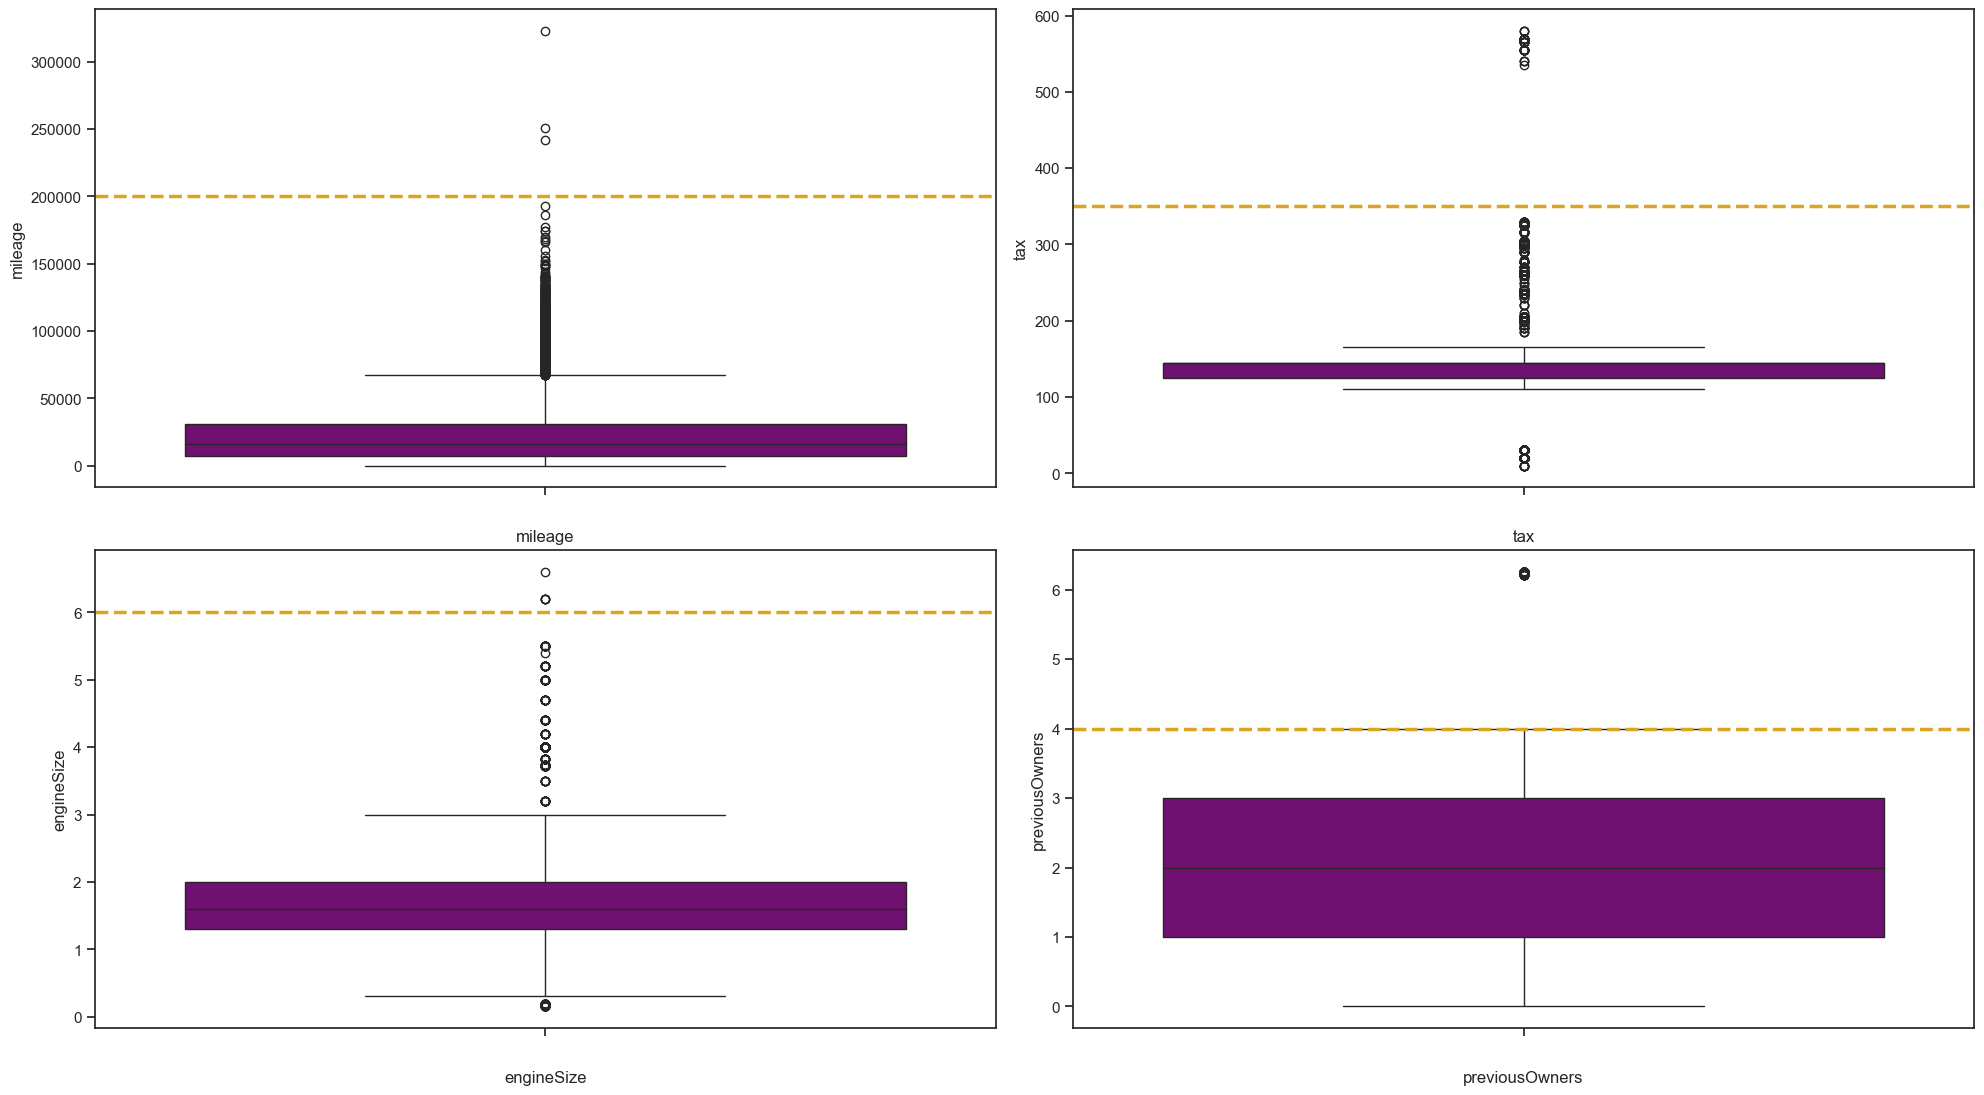

In [1424]:
sns.set_style("ticks")
fig, axes = plt.subplots(2, 
                         2, 
                         figsize=(20, 11))

lines = {'mileage': 200000, 'tax': 350, 'engineSize': 6, 'previousOwners': 4}

for ax, feat in zip(axes.flatten(), metric_features[:2] + ['engineSize'] + ['previousOwners']):
    sns.boxplot(y=X_train[feat], color='purple', ax=ax)
    ax.set_title(feat, y=-0.13)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
    
    
    if feat in lines:
        ax.axhline(lines[feat], color='goldenrod', linestyle='--', linewidth=2.5)

plt.tight_layout()
plt.show()

Now we will manually remove the outliers on these 3 features.

In [1428]:
#remove outliers from tax
X_manuallyremoved = X_train[X_train['tax'] < 400]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved.shape[0] / X_train.shape[0], 4)*100,"%")

#remove outliers from previous owners
X_manuallyremoved=X_manuallyremoved[X_manuallyremoved['previousOwners']<= 4]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved.shape[0] / X_train.shape[0], 4)*100,"%")

#remove outliers from engineSize
X_manuallyremoved=X_manuallyremoved[X_manuallyremoved['engineSize']<= 6]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved.shape[0] / X_train.shape[0], 4)*100,"%")

#remove outliers from mileage
X_manuallyremoved=X_manuallyremoved[X_manuallyremoved['mileage']<= 200000]
print('Percentage of data kept after removing outliers:', 
      np.round(X_manuallyremoved.shape[0] / X_train.shape[0], 4)*100,"%")

print("Número final de observações:", X_train.shape[0])

Percentage of data kept after removing outliers: 99.83 %
Percentage of data kept after removing outliers: 97.28999999999999 %
Percentage of data kept after removing outliers: 97.28999999999999 %
Percentage of data kept after removing outliers: 97.28 %
Número final de observações: 40797


In [1426]:
for col in metric_features:
    Q1 = X_manuallyremoved[col].quantile(0.25)
    Q3 = X_manuallyremoved[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outliers = X_manuallyremoved[(X_manuallyremoved[col] < lower) | (X_manuallyremoved[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(X_manuallyremoved):.2%})")

print("Número final de observações:", X_manuallyremoved.shape[0])

mileage: 1753 outliers (4.42%)
tax: 9656 outliers (24.33%)
mpg: 586 outliers (1.48%)
engineSize: 388 outliers (0.98%)
paintQuality%: 0 outliers (0.00%)
previousOwners: 0 outliers (0.00%)
hasDamage: 0 outliers (0.00%)
Número final de observações: 39687


'engineSize','mileage' and 'mpg' outliers are still noticiable but a very small percentage, moreover we can remove them.

In [1427]:
X_cleaned = X_manuallyremoved.copy()

cols_to_remove = ['mileage', 'mpg', 'engineSize']

for col in cols_to_remove:
    Q1 = X_cleaned[col].quantile(0.25)
    Q3 = X_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # identificar outliers desta coluna
    outliers = X_cleaned[(X_cleaned[col] < lower) | (X_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(X_cleaned):.2%})")
    
    # remover apenas os outliers desta coluna
    X_cleaned = X_cleaned[(X_cleaned[col] >= lower) & (X_cleaned[col] <= upper)]

print("Número final de observações:", X_cleaned.shape[0])




mileage: 1753 outliers (4.42%)
mpg: 561 outliers (1.48%)
engineSize: 241 outliers (0.64%)
Número final de observações: 37132
